In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import sounddevice as sd
import scipy.signal as signal
import librosa

sys.path.append("/Users/oscarjimenezbou/Library/Mobile Documents/com~apple~CloudDocs/Documents/University_projects/TDS"
                )

In [2]:
from scipy.io import wavfile
from utils import *

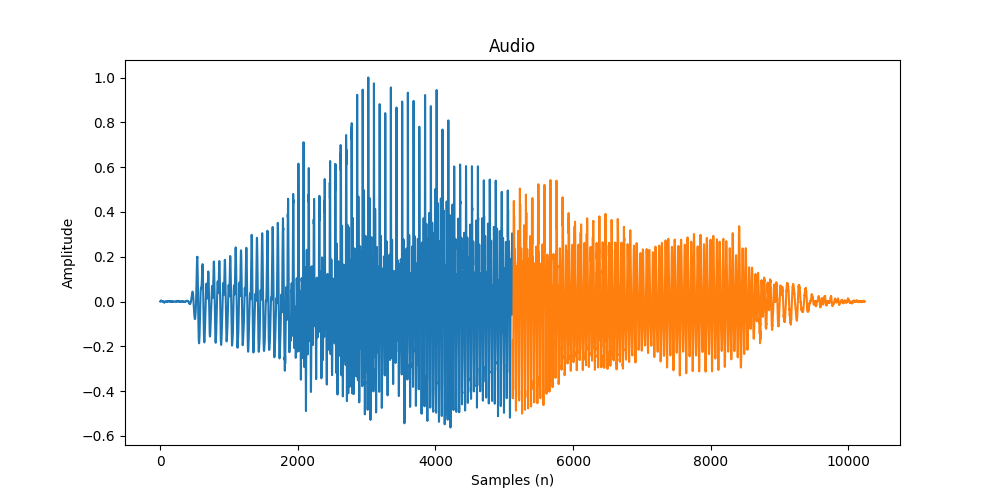

In [35]:
'''
- Extract the audio signal from the wav file and plot it
- normalize and convert the audio signal to mono
- trim the audio signal
- split the singnal and plot it
'''

%matplotlib widget
frequency_audio, audio = wavfile.read("nine.wav")

audio = audio / np.max(np.abs(audio))

yt, index = librosa.effects.trim(
    audio, top_db=20, frame_length=2048, hop_length=512)

audio = audio[index[0]:index[1]] # convert to mono

audio_frames = cut_signal_frames(audio, frequency_audio, 0.32)

samples = np.array([np.arange(0, len(audio)//2), np.arange(len(audio)//2, len(audio))])

plt.figure(figsize=(10, 5))
for i in range(0, len(audio_frames)):
    plt.plot(samples[i], audio_frames[i])
    plt.title("Audio")
    plt.xlabel("Samples (n)")
    plt.ylabel("Amplitude")
plt.show()
